# Exploratory Data Analysis

*In which we learn more about crabs and clean up the dataset.*


## Introduction

Crabs are here, and they're mighty tasty.

Knowing how old they are helps identify full-sized crabs that are ready for the pot.
 
![Crab](https://upload.wikimedia.org/wikipedia/commons/b/b1/Mud_crab%2C_Scylla_serrate.jpg?20220920192756)

Prediction (regression) of mud crab age based on physical features.

## Reasons for Choosing This Dataset

A good dataset is the foundation of a good model.

#### My reasons:

- Highly-rated tabular data with a natural prediction target (Age).
- Regression task since I like a challenge.
- Features easy to conceptualize for feature engineering.
- On the smaller side to quickly iterate on.
- Crabs are cool.

##### Reasons given by the [dataset on Kaggle](https://www.kaggle.com/datasets/sidhus/crab-age-prediction):

> Its a great starting point for classical regression analysis and feature engineering and understand the impact of feature engineering in Data Science domain.
> For a commercial crab farmer knowing the right age of the crab helps them decide if and when to harvest the crabs. Beyond a certain age, there is negligible growth in crab's physical characteristics and hence, it is important to time the harvesting to reduce cost and increase profit.

### Dataset Columns

The dataset contains the following columns:

---

| Column Name    | Description                                                                                         |
|----------------|-----------------------------------------------------------------------------------------------------|
| Sex            | Gender of the Crab - Male, Female and Indeterminate.                                                |
| Length         | Length of the Crab (in Feet; 1 foot = 30.48 cms)                                                    |
| Diameter       | Diameter of the Crab (in Feet; 1 foot = 30.48 cms)                                                  |
| Height         | Height of the Crab (in Feet; 1 foot = 30.48 cms)                                                    |
| Weight         | Weight of the Crab (in ounces; 1 Pound = 16 ounces)                                                 |
| Shucked Weight | Weight without the shell (in ounces; 1 Pound = 16 ounces)                                           |
| Viscera Weight | is weight that wraps around your abdominal organs deep inside body (in ounces; 1 Pound = 16 ounces) |
| Shell Weight   | Weight of the Shell (in ounces; 1 Pound = 16 ounces)                                                |
| Age            | Age of the Crab (in months)                                                                         |


### Define Constants

The PREDICTION_TARGET constant defines the column from the dataset which we will predict. 'Age' is the target column in this case.


In [59]:
DATASET_FILE = '../datasets/CrabAgePrediction.csv' # 'https://www.kaggle.com/sidhus/crab-age-prediction/download' or './data/CrabAgePrediction.csv'
NEXT_CACHE_FILE = '../cache/crabs.feather'
NEXT_NOTEBOOK = '../0-eda/overfit.ipynb'

PREDICTION_TARGET = 'Age'               # 'Age' is predicted
DATASET_COLUMNS = ['Sex','Length','Diameter','Height','Weight','Shucked Weight','Viscera Weight','Shell Weight',PREDICTION_TARGET]
REQUIRED_COLUMNS = [PREDICTION_TARGET]  # 'Age' is required


### Importing Libraries

In [60]:
from notebooks.time_for_crab.mlutils import data_downcasting, display_df

import numpy as np
import pandas as pd
import pathlib

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('mode.copy_on_write', True)


## Exploratory Data Analysis

Get that pot of water ready. It's crab cookin' time.

![Crab pot](https://chefscornerstore.com/product_images/uploaded_images/steaming-crabs.jpg)

### Load the Data from CSV

Analyzing the output here will help us revise our data cleanup and augmentation functions.

The initial data is in CSV format. We will load it into a pandas DataFrame.  
We will ultimately save it to a JSON file for easier loading in the next steps.


In [61]:
crabs = pd.read_csv(DATASET_FILE)  # load the data
display_df(crabs, show_info=True, show_missing=True, show_distinct=True)


DataFrame shape: (3893, 9)
First 5 rows:
  Sex  Length  Diameter  Height     Weight  Shucked Weight  Viscera Weight  \
0   F  1.4375    1.1750  0.4125  24.635715       12.332033        5.584852   
1   M  0.8875    0.6500  0.2125   5.400580        2.296310        1.374951   
2   I  1.0375    0.7750  0.2500   7.952035        3.231843        1.601747   
3   F  1.1750    0.8875  0.2500  13.480187        4.748541        2.282135   
4   I  0.8875    0.6625  0.2125   6.903103        3.458639        1.488349   

   Shell Weight  Age  
0      6.747181    9  
1      1.559222    6  
2      2.764076    6  
3      5.244657   10  
4      1.700970    6  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3893 non-null   object 
 1   Length          3893 non-null   float64
 2   Diameter        3893 non-null   float64
 3   Height          

### Memory Reduction

Crabs were never known for their memory. Let's minimize the memory of our DataFrame using the smallest data types to fit the data.

The reason for this is to save computational resources and time. The smaller the data container, the faster the processing.


In [62]:
crabs = data_downcasting(crabs)
display_df(crabs, show_info=True, show_missing=True, show_distinct=True)


Memory usage of dataframe is 0.2674 MB (before)
Memory usage of dataframe is 0.0855 MB (after)
Reduced 68.0%
DataFrame shape: (3893, 9)
First 5 rows:
  Sex    Length  Diameter    Height     Weight  Shucked Weight  \
0   F  1.437500  1.174805  0.412598  24.640625       12.335938   
1   M  0.887695  0.649902  0.212524   5.402344        2.296875   
2   I  1.037109  0.774902  0.250000   7.953125        3.232422   
3   F  1.174805  0.887695  0.250000  13.476562        4.750000   
4   I  0.887695  0.662598  0.212524   6.902344        3.458984   

   Viscera Weight  Shell Weight  Age  
0        5.585938      6.746094    9  
1        1.375000      1.559570    6  
2        1.601562      2.763672    6  
3        2.281250      5.246094   10  
4        1.488281      1.701172    6  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             38

### Examine the Data

Now we make sure the crabs will easily digest in our model.

#### Missing Values

No missing values! We're off to a good start with this dataset. *Will crab be on the menu tonight?*

#### Non-numeric Data

It looks like 'Sex' is a categorical variable. We'll need to convert this to a numeric value. Let's use **one-hot encoding**.


### Cleanup the Crabs

Dirty data is no good for crabs. Let's clean it up.

![How to clean a crab](https://www.recipetineats.com/wp-content/uploads/2021/07/Cleaning-and-preparing-crab-template-2.jpg)

#### Crab Cleaning Steps

- ~~Drop rows missing required columns~~.
    - E.g., 'Age'. 
- ~~Drop rows missing too many values~~.
    - E.g., more than 3 missing values.
- ~~Convert natural booleans to 0/1~~.
    - E.g., Y/N to 0/1.
- ~~Fill nulls for typically-binary variables with the median~~.
- ~~Fill nulls for typically-continuous variables with the median~~.
- ~~Fill nulls for typically-text variables with empty strings~~.
- One-hot encode categorical variables.
    - This should handle nulls for categorical variables.

~~Strike-throughs~~ ended up not being needed for this dataset.

#### Avoid Data Leakage!

While cleaning the data during EDA, we should avoid data leakage.

- Do not use test data to normalize values.
- Avoid filling missing values with the mean or median of the entire dataset.
- Always check for duplicate rows before and after splitting the data.


In [63]:
def data_cleanup(df:pd.DataFrame) -> pd.DataFrame:
    """Clean-up the DataFrame for crabs.

    Update values:
        - Drop rows missing required columns.
        - Drop rows missing too many values.
        - Convert natural booleans
            - E.g., `Y/N` or `Positive/Negative` to `0/1`.
        - Fill nulls for typically-binary variables with `0.5`.
        - Fill nulls for typically-continuous variables with the median.
        - Fill nulls for typically-categorical variables with default values.
            - E.g., `Unknown`
        - Fill nulls for typically-text variables with empty strings.
        - One-hot encode categorical variables.

    :param df: The data.
    :return: The data without disposals.
    """
    # remove rows missing too many values
    df = df.dropna(thresh=3)

    # remove rows missing required columns
    df = df.dropna(subset=REQUIRED_COLUMNS)

    # convert natural booleans
    df = df.replace(to_replace={
        False: 0, True: 1,
        'negative': 0, 'positive': 1,
        'No': 0, 'Yes': 1,
    })

    # fill nulls for typically-binary variables with the median
    # df['  '] = df['  '].fillna(df['  '].median())

    # fill nulls for typically-continuous variables with the median
    # df['  '] = df['  '].fillna(df['  '].median())

    # fill nulls for typically-categorical variables with default values
    # df['  '] = df['  '].fillna('Unknown')

    # fill nulls for typically-text variables with empty strings
    # df['  '] = df['  '].fillna('')

    # one-hot encode categorical variables
    df = pd.get_dummies(df, columns=['Sex'])

    # determine which features are most important
    return df


In [64]:
crabs = data_cleanup(crabs)
display_df(crabs, show_info=True, show_missing=False, show_distinct=True)


DataFrame shape: (3893, 11)
First 5 rows:
     Length  Diameter    Height     Weight  Shucked Weight  Viscera Weight  \
0  1.437500  1.174805  0.412598  24.640625       12.335938        5.585938   
1  0.887695  0.649902  0.212524   5.402344        2.296875        1.375000   
2  1.037109  0.774902  0.250000   7.953125        3.232422        1.601562   
3  1.174805  0.887695  0.250000  13.476562        4.750000        2.281250   
4  0.887695  0.662598  0.212524   6.902344        3.458984        1.488281   

   Shell Weight  Age  Sex_F  Sex_I  Sex_M  
0      6.746094    9   True  False  False  
1      1.559570    6  False  False   True  
2      2.763672    6  False   True  False  
3      5.246094   10   True  False  False  
4      1.701172    6  False   True  False  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          3893 no

### Show the Heatmap

Let's see how the data correlates with the target variable.

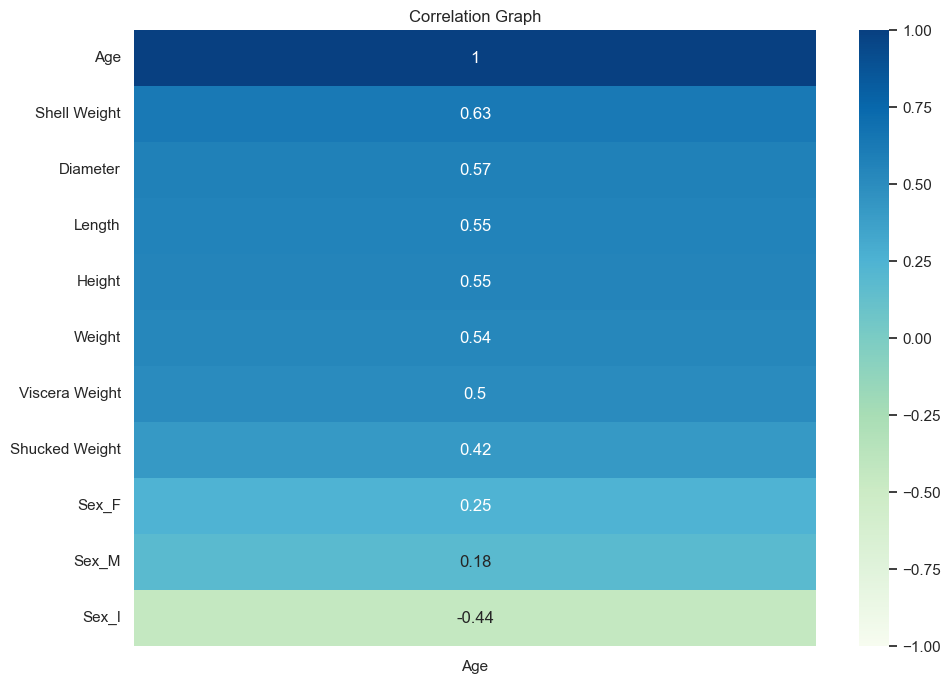

In [65]:
sns.set()
plt.figure(figsize = (11,8))
plt.title('Correlation Graph')
# Plotting the heatmap to check the correlation between the Target Label and other features
sns.heatmap(crabs.corr()[[PREDICTION_TARGET]].sort_values(by=PREDICTION_TARGET, ascending=False), vmin=-1, vmax=1, annot=True, cmap='GnBu')
plt.show()


### Show the Histograms

Let's see how the data is distributed.


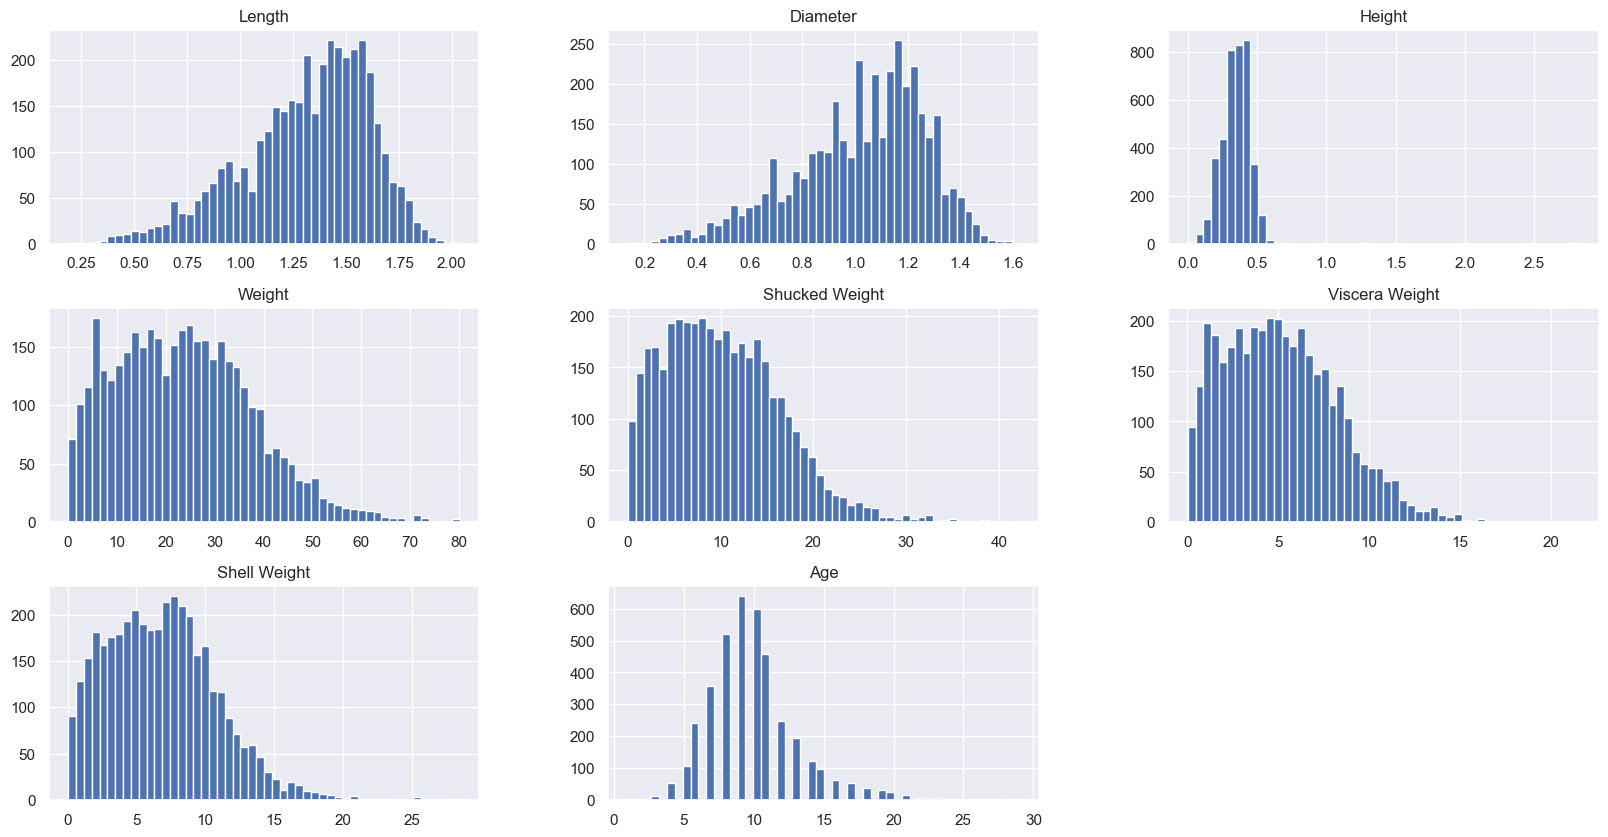

In [66]:
# Plotting the distribution of the features
crabs.hist(figsize=(20, 10), bins=50)
plt.show()


#### Histogram Observations

- `Length` and `Diameter` features have a similar distribution.
    - Makes me wonder if they are correlated as well.
- `Height` has a very skewed distribution.
    - Outlier removal should definitely help here.
- All `*Weight` features have distribution skewed low.
    - Normalization might help here as well.
- `Age` seems to have a normal distribution.
    - This is good for regression tasks.
    - They must estimate the age of the crab with mainly even numbers.


### Show the Pair Plot

Let's see how the data correlates with the target variable.


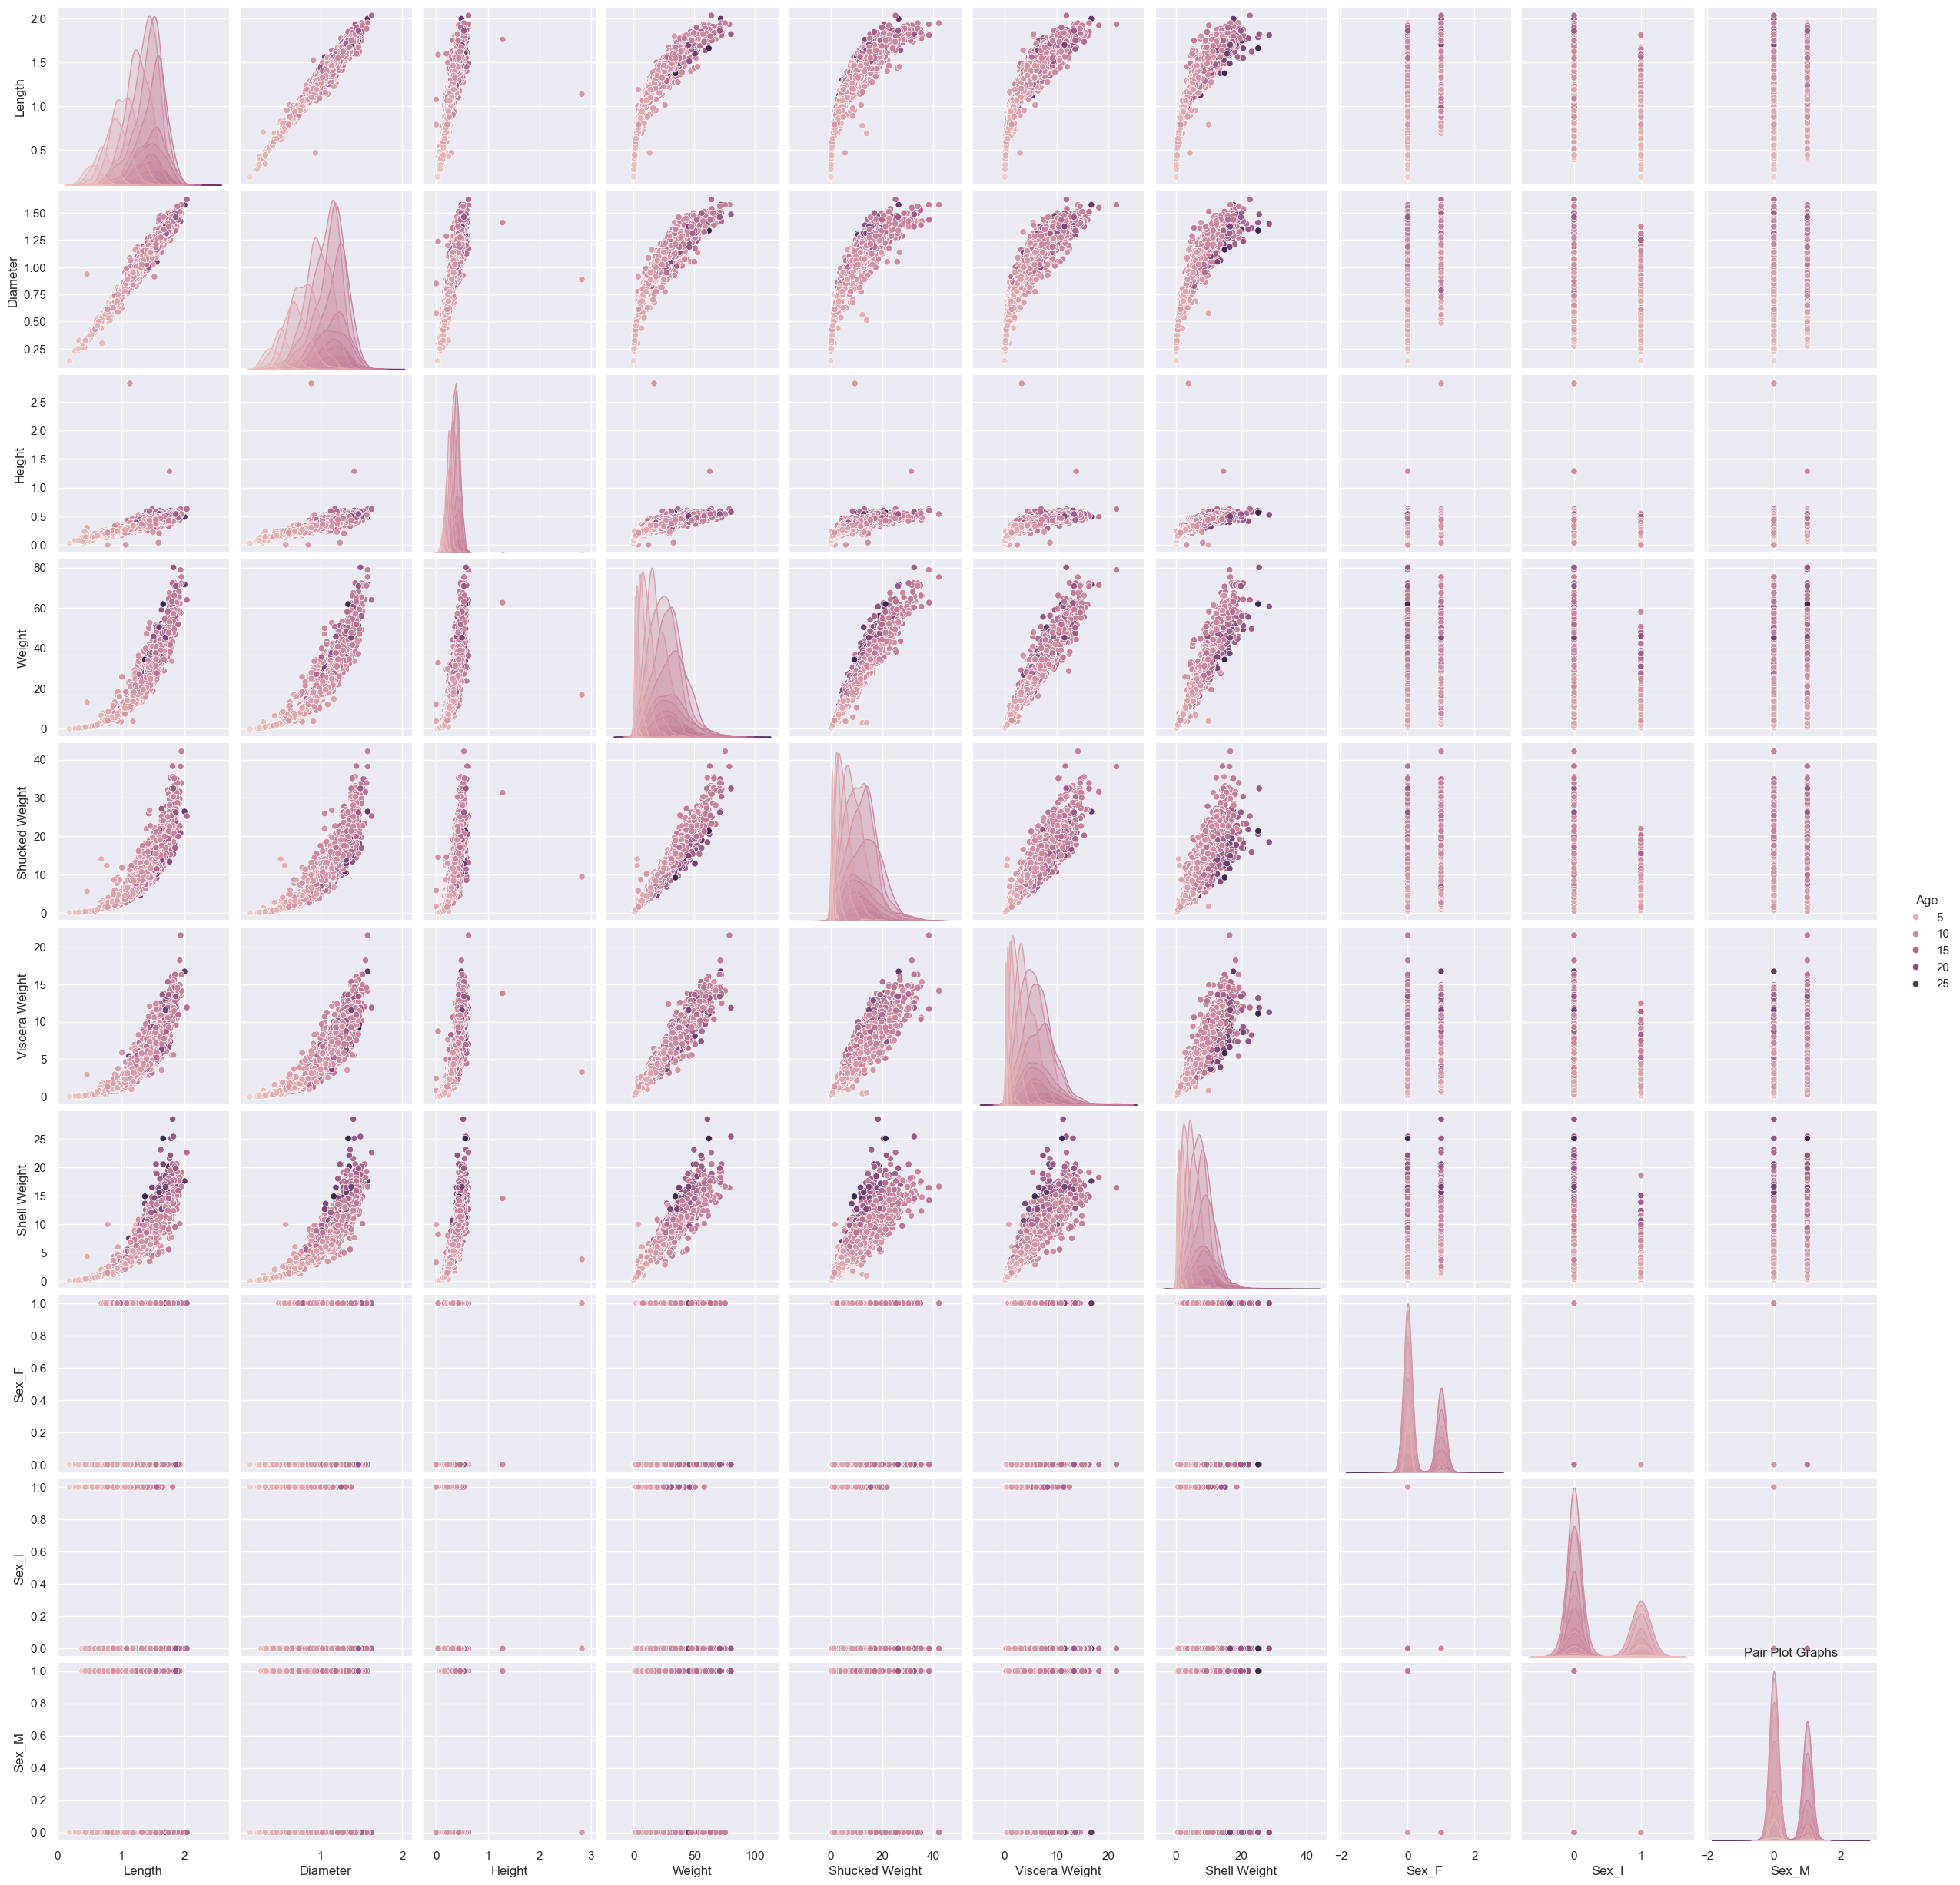

In [67]:
# Plotting the pairplot to check the correlation between the Target Label and other features
sns.pairplot(crabs, hue=PREDICTION_TARGET)
plt.title('Pair Plot Graphs')
plt.show()


#### Pair Plot Observations

- `Length` and `Diameter` are highly correlated.
    - This makes sense since they are both measurements of the same thing.


### Show the Box Plots

Another type of distribution visualization, box plots give us more insight on the outliers.
 

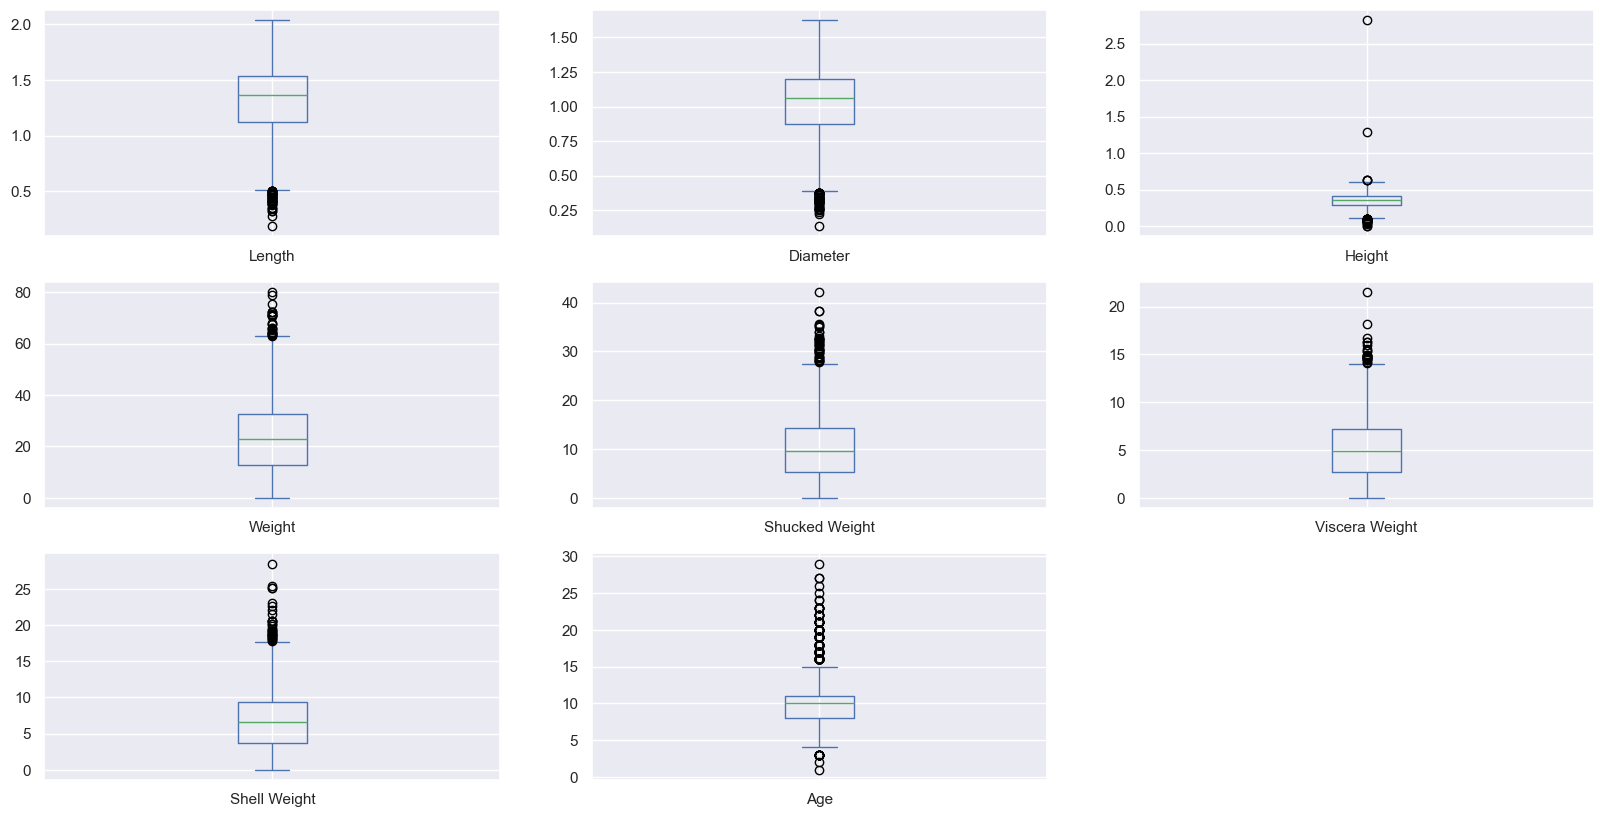

In [68]:
# Plotting the boxplot of the features
crabs.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(20, 10))
plt.show()


#### Box Plot Observations

- `Height` has a relatively huge difference in the largest outliers.
    - Perhaps outlier removal is needed for this feature.
- `Length` and `Diameter` features have outliers trending downwards.
- All `*Weight` features have outliers trending upwards.
    - This suggests there are some mega-crabs to catch out there!


### Save the Data

So we can pick this back up on the [next step](../0-eda/overfit.ipynb).


In [69]:
# create the cache directory if it doesn't exist
pathlib.Path('../cache').mkdir(parents=True, exist_ok=True)

crabs.to_feather(NEXT_CACHE_FILE)


### Onwards to Overfitting

See the [next section](../0-eda/overfit.ipynb) to overfit on purpose.
